In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import Aer
from qiskit.providers.aer import unitary_simulator
backend = Aer.get_backend('unitary_simulator')
simulator = Aer.get_backend('qasm_simulator')
statevector= Aer.get_backend('statevector_simulator')
%config InlineBackend.figure_format = 'svg' # Makes the images look nice


from qiskit.quantum_info import random_statevector

In [2]:
#Teleportation
qr= QuantumRegister(3)
cr= ClassicalRegister(1)
crz= ClassicalRegister(1)
tele= QuantumCircuit(qr,cr,crz) #Teleportation circuit

In [33]:
qr= QuantumRegister(3)
crx= ClassicalRegister(1)
crz= ClassicalRegister(1)
tele= QuantumCircuit(qr,crz,crx)
def bell_state(qc,a,b):      #bell state creation
    qc.h(a)
    qc.cx(a,b)
    return qc
def alice_gate(qc,psi,a):
    qc.cx(psi,a)      #cnot gate by psi to q1
    qc.h(psi)
    return qc
def measure_send(qc,a,b):
    """measure a and b and send to bob to further operation"""
    qc.measure(a,0)
    qc.measure(b,1)
    return qc
def bob_gate(qc,qubit,crz,crx):
    qc.z(qubit).c_if(crz,1)
    qc.x(qubit).c_if(crx,1)
    return qc
def random_state(qc,reg_entry):
    a=random_statevector(2)   # 2 = dimension
    random_state = a.data
    qc.initialize(random_state,reg_entry)
    return qc,random_state
def intermediate_print(qc):
    outvector=execute(qc,statevector).result().get_statevector(qc)
    return plot_bloch_multivector(outvector)
def finalres(qc):
    res=execute(qc,simulator).result().get_counts(qc)
    return plot_histogram(res)

# bell_state(tele,qr[1],qr[2])
# tele.barrier()
# alice_gate(tele,0,1)
# tele.barrier()
# measure_send(tele,0,1)
# tele.barrier()
# bob_gate(tele,2,crz,crx)
# tele.draw(output='mpl')

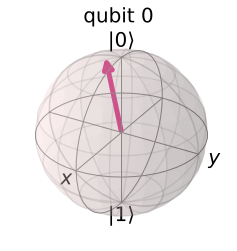

In [4]:
from qiskit.quantum_info import random_statevector
p=random_statevector(2)    #create random state vector
#p
plot_bloch_multivector(p.data)

In [5]:
from qiskit.quantum_info import random_statevector
a=random_statevector(2)   # 2 = dimension

qc = QuantumCircuit(1,1)
initial_state = a.data
qc.initialize(initial_state,0)

#qc.measure(0,0)

qc.draw()
#counts=execute(qc,simulator).result().get_counts(qc)    # simulator = Aer.get_backend('qasm_simulator')
#plot_histogram(counts)

┌────────────────────────────────────────────────────┐
q_0: ┤ initialize(-0.49534+-0.81852j,-0.084939+-0.27829j) ├
     └────────────────────────────────────────────────────┘
c_0: ══════════════════════════════════════════════════════

In [ ]:
qr= QuantumRegister(3)
crx= ClassicalRegister(1)
crz= ClassicalRegister(1)
cr= ClassicalRegister(3)
tele= QuantumCircuit(qr,crz,crx,cr) #create quantum circuit

#create Bell state
tele=bell_state(tele,1,2)
cpy1=tele.copy()

#create random statevector
tele,psi=random_state(tele,0)
cpy2=tele.copy()

#alicegate creation
tele=alice_gate(tele,0,1)
tele.barrier()
cpy3=tele.copy()


tele=measure_send(tele,0,1)
cpy4=tele.copy()

tele.barrier()
cpy1.draw()
intermediate_print(cpy2)


for i in range(2):
    tele.measure(1,0)

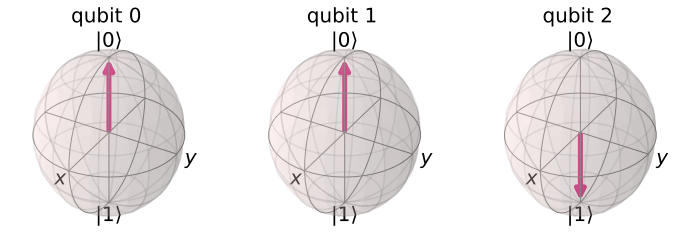

In [45]:
tele=bob_gate(tele,2,crz,crx)
cpy5=tele.copy()
tele.measure(2,0)
cpy6=tele.copy()
tele.draw()
intermediate_print(tele)

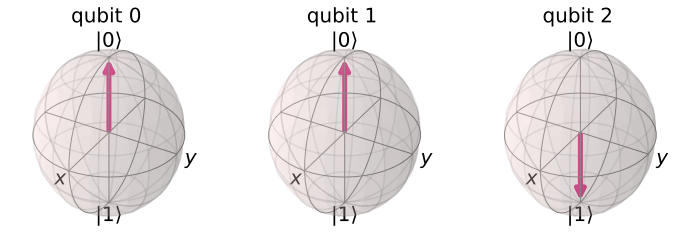

In [46]:
outvector=execute(tele,statevector).result().get_statevector(tele)
plot_bloch_multivector(outvector)


In [47]:
telet=[cpy1,cpy2,cpy3,cpy4,cpy5,cpy6]
for i in range(5):
    telet[i].measure(qr,cr)
    out=finalres(telet[i])
    plt.hist(out)
    plt.show()


CircuitError: 'register size error'

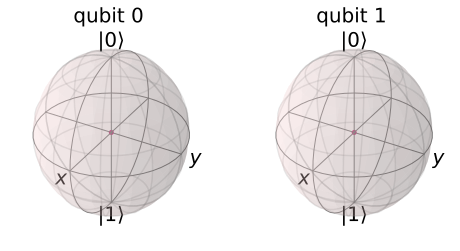

In [25]:
q1=QuantumCircuit(2,2)
q1.h(0)
q1.cx(0,1)
#q1.measure(0,0)
#q1.measure(1,1)
outvector=execute(q1,statevector).result().get_statevector(q1)
plot_bloch_multivector(outvector)

In [ ]:
#Teleportation successful


# #using Qasm simulator
# inverse_init_gate= init_gate.gate_to_compute()#inverse of initialise implies psi to 0

# tele.append(inverse_init_gate,[2])
# qc.draw(output='mpl')
# #no init gate

In [ ]:
count1=finalres(cpy1)